In [75]:
!pip install antigranular


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [76]:
import antigranular as ag
import matplotlib.pyplot as plt
import numpy as np
session = ag.login(<client_id>,<client_secret>, dataset = "Diamonds Dataset")

local_host_port: 1992722f-2edb-4cc6-8b13-f2124754edc1
server_hostname: ip-100-100-23-20.eu-west-1.compute.internal
cert_thumbprint: f2889bf1b053bc7ffebbd9b6d51ebb212be9f486c5282c6f1c7f452d9b3c512e6e3ba74ab64836d2bf1d4711416dfaf73e2e199fdfcf50e399ef69337e4c3c82
tls_cert_name: ip-100-100-23-20.eu-west-1.compute.internal_1992722f-2edb-4cc6-8b13-f2124754edc1
Dataset "Diamonds Dataset" loaded to the kernel as diamonds_dataset
Key Name                       Value Type     
---------------------------------------------
train_x                        PrivateDataFrame
train_y                        PrivateDataFrame
test_x                         DataFrame      

Connected to Antigranular server session id: 8c22d4fb-4757-4c73-8b68-4845e269fa51, the session will time out if idle for 25 minutes
Cell magic '%%ag' registered successfully, use `%%ag` in a notebook cell to execute your python code on Antigranular private python server
🚀 Everything's set up and ready to roll!


In [77]:
%%ag
train_x = diamonds_dataset['train_x']
train_y = diamonds_dataset['train_y']
test_x = diamonds_dataset['test_x']

In [78]:
%%ag
desc = train_x.describe(eps=1.)
export(desc, 'desc')

Setting up exported variable in local environment: desc


In [79]:
print(desc)

              carat         depth         table             x             y  \
count  37695.000000  37768.000000  38036.000000  37697.000000  37779.000000   
mean       0.805858     61.692201     57.509999      5.760425      5.773525   
std        0.550868      1.595525      1.368282      0.915894      2.518277   
min        0.200000     43.000000     43.000000      0.000000      0.000000   
25%        0.491715     60.844509     56.162898      5.004374      4.816096   
50%        0.710946     62.109203     57.673231      5.928391      5.924444   
75%        0.976009     62.348584     57.903043      6.644827      6.295819   
max        2.090151     74.123530     67.801345      8.352457     10.477905   

                  z  
count  37690.000000  
mean       3.565535  
std        1.319368  
min        0.000000  
25%        2.777495  
50%        3.389706  
75%        4.011091  
max       24.521700  


In [80]:
%%ag
train_x.info()
train_y.info()

+----+----------+-------------+---------------+---------+--------------+
|    | Column   | numerical   | categorical   | dtype   | bounds       |
|----+----------+-------------+---------------+---------+--------------|
|  0 | carat    | True        | False         | float64 | (0.2, 5.01)  |
|  1 | cut      | False       | False         | object  | None         |
|  2 | color    | False       | False         | object  | None         |
|  3 | clarity  | False       | False         | object  | None         |
|  4 | depth    | True        | False         | float64 | (43.0, 79.0) |
|  5 | table    | True        | False         | float64 | (43.0, 95.0) |
|  6 | x        | True        | False         | float64 | (0.0, 10.74) |
|  7 | y        | True        | False         | float64 | (0.0, 58.9)  |
|  8 | z        | True        | False         | float64 | (0.0, 31.8)  |
+----+----------+-------------+---------------+---------+--------------+
+----+----------+-------------+---------------+----

In [81]:
%%ag
ag_print(train_y.describe(eps=1.))

              price
count  37771.000000
mean    3953.131110
std     4029.200319
min      329.693872
25%      956.323447
50%     2404.542926
75%     5374.564652
max    18739.337030



In [82]:
%%ag
unique_categories = {}
for column in test_x.columns:
    if column not in train_x.metadata:   #Non numerical column
        unique_categories.update({column: test_x[column].unique().tolist()})
ag_print(unique_categories)

{'cut': ['Ideal', 'Very Good', 'Premium', 'Fair', 'Good'], 'color': ['G', 'F', 'E', 'D', 'H', 'I', 'J'], 'clarity': ['VVS1', 'VVS2', 'SI2', 'VS1', 'VS2', 'SI1', 'IF', 'I1']}



In [83]:
%%ag
encoding_scheme_train_x_gen = {}

for column, values in unique_categories.items():
    encoding_scheme_train_x_gen[column] = {value: idx for idx, value in zip(range(len(values)), values)}

ag_print(encoding_scheme_train_x_gen)

{'cut': {'Ideal': 0, 'Very Good': 1, 'Premium': 2, 'Fair': 3, 'Good': 4}, 'color': {'G': 0, 'F': 1, 'E': 2, 'D': 3, 'H': 4, 'I': 5, 'J': 6}, 'clarity': {'VVS1': 0, 'VVS2': 1, 'SI2': 2, 'VS1': 3, 'VS2': 4, 'SI1': 5, 'IF': 6, 'I1': 7}}



In [84]:
%%ag
encoding_scheme_train_x = {'cut': {'Ideal': 0, 'Very Good': 1, 'Premium': 2, 'Fair': 3, 'Good': 4}, 'color': {'G': 0, 'F': 1, 'E': 2, 'D': 3, 'H': 4, 'I': 5, 'J': 6}, 'clarity': {'VVS1': 0, 'VVS2': 1, 'SI2': 2, 'VS1': 3, 'VS2': 4, 'SI1': 5, 'IF': 6, 'I1': 7}}

In [85]:
%%ag
for col, value in encoding_scheme_train_x.items():
    train_x[col] = train_x[col].map(value, eps=1)

In [86]:
%%ag
ag_print(train_x.describe(eps=.1))

              carat         depth  ...         color       clarity
count  38392.000000  37298.000000  ...  38957.000000  38313.000000
mean       0.764916     62.064363  ...      2.406796      3.330245
std        0.535929      5.409862  ...      2.418659      1.086840
min        0.200000     43.000000  ...      0.000000      0.000000
25%        0.431304     61.009776  ...      0.485438      1.201743
50%        0.581398     62.084436  ...      3.614863      3.266786
75%        1.618376     63.744201  ...      2.768983      4.895760
max        3.734528     63.218623  ...      4.330681      5.377362

[8 rows x 9 columns]



In [87]:
%%ag
train_x.info()

+----+----------+-------------+---------------+---------+--------------+
|    | Column   | numerical   | categorical   | dtype   | bounds       |
|----+----------+-------------+---------------+---------+--------------|
|  0 | carat    | True        | False         | float64 | (0.2, 5.01)  |
|  1 | cut      | True        | False         | int64   | (0.0, 8.0)   |
|  2 | color    | True        | False         | int64   | (0.0, 8.0)   |
|  3 | clarity  | True        | False         | int64   | (0.0, 8.0)   |
|  4 | depth    | True        | False         | float64 | (43.0, 79.0) |
|  5 | table    | True        | False         | float64 | (43.0, 95.0) |
|  6 | x        | True        | False         | float64 | (0.0, 10.74) |
|  7 | y        | True        | False         | float64 | (0.0, 58.9)  |
|  8 | z        | True        | False         | float64 | (0.0, 31.8)  |
+----+----------+-------------+---------------+---------+--------------+



In [88]:
%%ag
for col, value in encoding_scheme_train_x.items():
    test_x[col] = test_x[col].map(value)

In [89]:
%%ag
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16182 entries, 0 to 16181
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    16182 non-null  float64
 1   cut      16182 non-null  int64  
 2   color    16182 non-null  int64  
 3   clarity  16182 non-null  int64  
 4   depth    16182 non-null  float64
 5   table    16182 non-null  float64
 6   x        16182 non-null  float64
 7   y        16182 non-null  float64
 8   z        16182 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 1.1 MB



In [90]:
%%ag
priv_corr = train_x.corr(eps=5)
export(priv_corr , 'priv_corr')

Setting up exported variable in local environment: priv_corr


<Axes: >

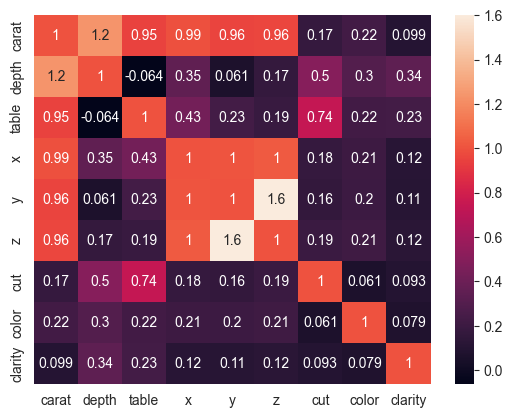

In [91]:
import pandas as pd
import seaborn as sns
result = priv_corr.apply(pd.to_numeric, errors='coerce').astype(float)
sns.heatmap(result , annot = True)

In [92]:
%%ag
hist={}
for column in train_x.columns:
    hist[column]=train_x[column].hist(0.1)
export(hist, 'hist')

Setting up exported variable in local environment: hist


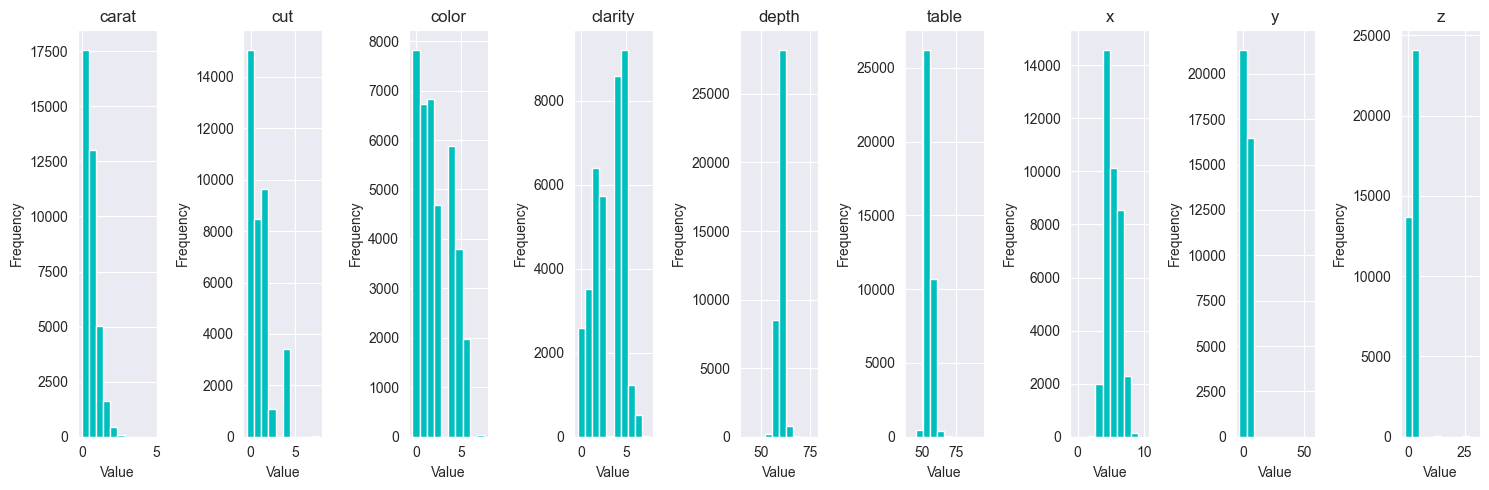

In [93]:

num_cols = 9
num_rows = np.ceil(len(hist) / num_cols).astype(int)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))
axs = axs.ravel()  # flatten the array of axes

for i, col in enumerate(hist):
    values, bin_edges = hist[col]
    bin_width = bin_edges[1] - bin_edges[0]
    axs[i].bar(bin_edges[:-1], values, width=bin_width, color='c')
    axs[i].set_title(col)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# Remove unused subplots
for i in range(len(hist), num_rows*num_cols):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

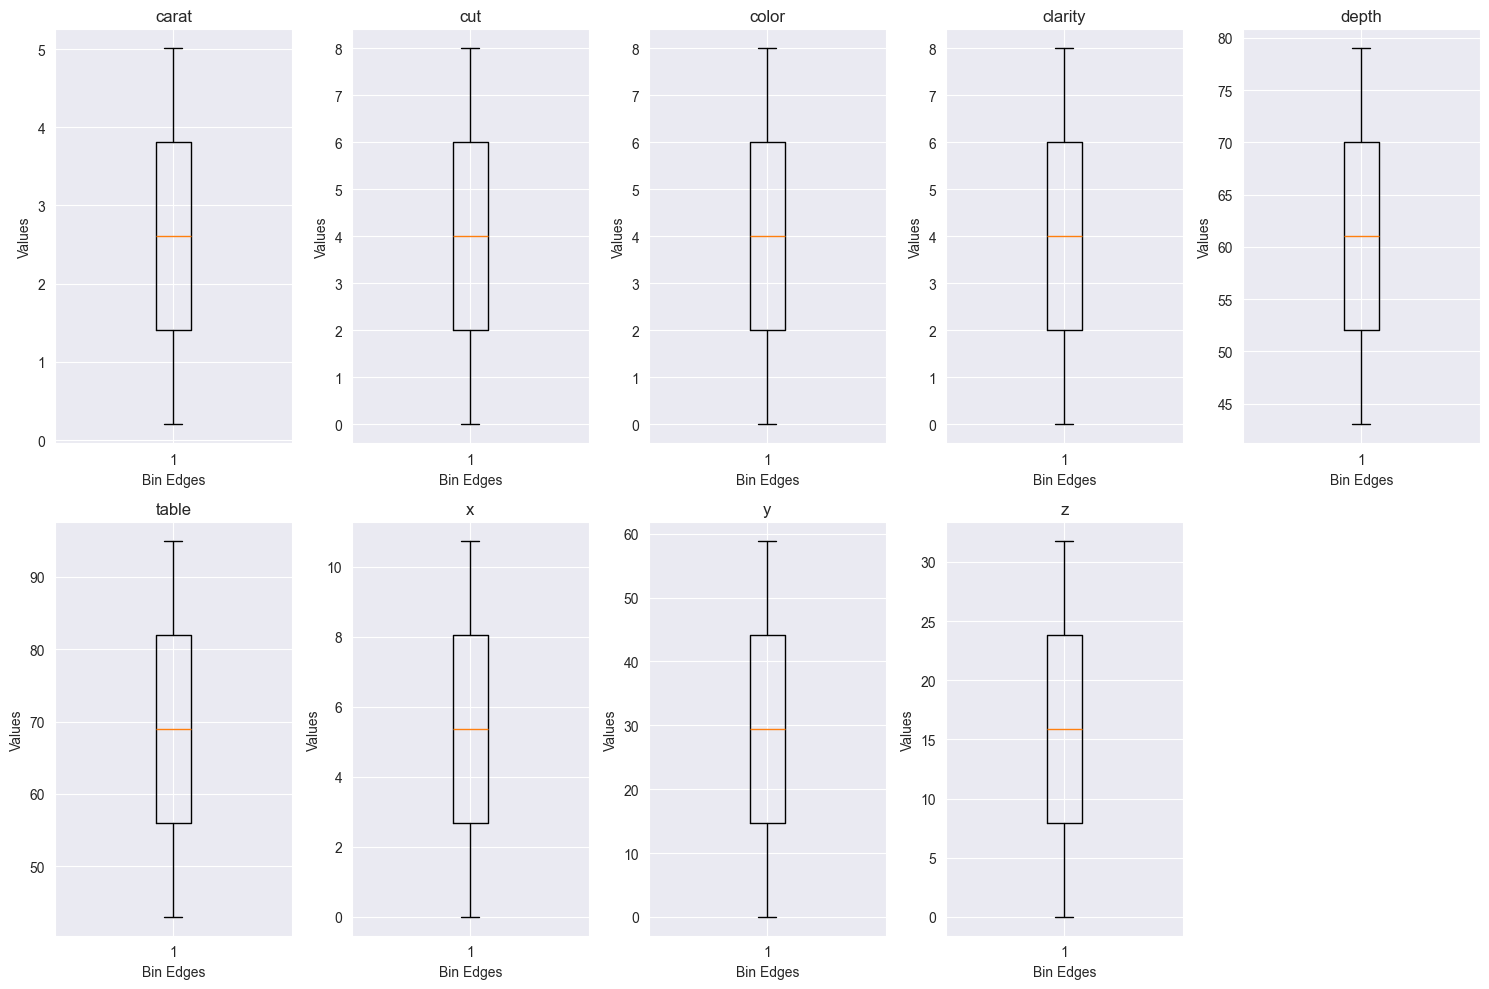

In [94]:
# box plot
num_cols = 5
num_rows = np.ceil(len(hist) / num_cols).astype(int)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))
axs = axs.ravel()  # flatten the array of axes

for i, col in enumerate(hist):
    values, bin_edges = hist[col]
    axs[i].boxplot(bin_edges)
    axs[i].set_title(col)
    axs[i].set_xlabel('Bin Edges')
    axs[i].set_ylabel('Values')

# Remove unused subplots
for i in range(len(hist), num_rows*num_cols):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

In [95]:
print(session.privacy_odometer())


{'total_epsilon_used': 10.999999999999998, 'total_delta_used': 0.0, 'library_costs': None, 'dataset_costs': None}


In [96]:
session.terminate_session()

{'status': 'ok'}